In [1]:
import matplotlib.pyplot as plt #Library for visualization
from wordcloud import WordCloud, STOPWORDS #Library for creating wordcloud
import requests #Library for http requests to a URL web
from bs4 import BeautifulSoup #Library for parsing HTML and XML
import os #Library for os dependent module
import pandas as pd #Library for data structures and analysis

In [2]:
#Set the url website
url = "http://quotes.toscrape.com"

In [5]:
#Get the html and check for error handling
def get_html(url):
    try:
        #Get a request for the url
        request = requests.get(url)
        if request.status_code == 200: #If successful send a status code 200
            return request.text #Sent text if it was
        else:
            print(f"Failed. Status code: {request.status_code}") #If not send error code
            return None
    #Handle any expections that happens
    except requests.exceptions.RequestException as e: #If except happens send error handling
        print(f"An handling error: {e}")
        return None

In [6]:
#Save data into a csv file
def save_2_csv(data, path):
    dataframe = pd.DataFrame(data) #Make a dataframe from the data
    dataframe.to_csv(path, index=False) #Make it into a csv file
    print(f"Data saved: {path}") #Print the saved location

In [ ]:
#Pull the quotes from the website and putting it into a dataset
def get_quotes(html_page):
    soup = BeautifulSoup(html_page, 'html.parser') #Make a object from the html
    quotes_data = []                               #Make a empty list to store the quote data
    quotes = soup.find_all('div', class_='quote')  #Get all div tag elements in the class quote
    for quote in quotes:                           #Loop every quote element
        txt = quote.find('span', class_='text').text    #Get the text from the quotes
        author = quote.find('small', class_='author').text  #Get the author of the quotes
        tags = [tag.text for tag in quote.find_all('a', class_='tag')] #Get the html tags from the quote
        quotes_data.append({'txt': txt, 'author': author, 'tags': tags}) #Make a dictionary from the current data and quote
    return quotes_data

In [ ]:
#Preprocessing the text for wordcloud
def wordcloud(quotes_data):
    txt = " ".join(quote['txt'] for quote in quotes_data) #Combine every text from the quote to one string
    txt = txt.replace('“', '').replace('”', '') #Take away any special characters
    return txt #Return the text back

In [ ]:
#Creating the world cloud
def make_wordcloud(txt):
    wordcloud = WordCloud(             #Initialize a wordcloud object with parameters
        width = 1200,                  #Width
        height = 600,                  #Height
        background_color = 'black',    #Background color
        stopwords = set(STOPWORDS),    #Set stopwords
        max_words = 200,               #Max numbers of words
        max_font_size = 100,           #Max front size
        random_state = 42,             #Reproducibility
        colormap='RdGy'                #Color map
    ).generate(txt)                    #Make wordcloud with preprocessed text

    plt.figure(figsize=(10, 5))                         #Set size of plot
    plt.imshow(wordcloud, interpolation="bilinear")     #Display wordcloud
    plt.axis('off')                                     #Turn on/off axis
    plt.title('Website Quotes')                         #Set title
    plt.show()                                          #Show plot

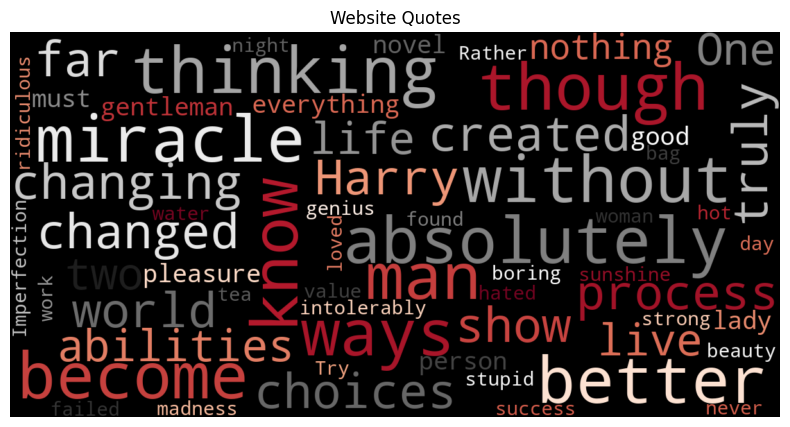

Data saved: c:\Users\antho\OneDrive\Desktop\Data Mining\Project3\quotes.csv


In [7]:
#Getting the quotes from the html, making the word cloud, and saving the quotes to a csv
html_page = get_html(url)             #Get html content from url
if html_page:                         #Check if it was retrieved
    quotes = get_quotes(html_page)    #Get quptes from html
    txt = wordcloud(quotes)           #Preprocess the quotes for wordcloud
    make_wordcloud(txt)               #Make the wordcloud
    save_path = os.path.join(os.getcwd(), 'quotes.csv')  #Get the path to save for csv file
    save_2_csv(quotes, save_path)                        #Save data into path
else:
    print("The page have failed to retrieve anything.")  #Print html error if failed